**Classification of Issues**

**Github Issues Classification using Machine Learning**

*   Predicting if Github Issue is a Bug, Enhancement or Question.

In [1]:
# Importing libraries
import pandas as pd # for data analysis
import neattext.functions as nfx # for text cleaning
import seaborn as sns

In [2]:
# Load Dataset from the csv
df_label = pd.read_csv('https://raw.githubusercontent.com/abritidas/Automatic-Issue-Labeling-using-Machine-Learning/refs/heads/main/github-labels-top3-34k.csv', header=None, sep=',')

In [3]:
df_label.head(10)

,0
0,__label__bug `cancelTimeout` is not a function...
1,__label__enhancement Switch Router to Browser ...
2,__label__bug PostgreSQL Binding fails ``` ⚠️ ...
3,__label__enhancement Enable autocompletion and...
4,__label__bug MacOS Chrome bug Scott McIntyre r...
5,__label__enhancement User should be able to ad...
6,__label__enhancement [page]: Add keyevent to c...
7,__label__enhancement 建议增加类似 redux-devtools 的停靠...
8,__label__bug Converting FBX file using convert...
9,__label__enhancement Browser.assert.text shoul...


#### Prepare Dataset
+ Extract labels and description from dataset
    - Categories:
        - Enhancement
        - Bug
        - Question

In [4]:
df_label = df_label[0].str.split(r'(__label__enhancement)|(__label__bug)|(__label__question)', expand=True)

In [5]:
df_label.head(10)

,0,1,2,3,4
0,,None,__label__bug,None,`cancelTimeout` is not a function ``` /build...
1,,__label__enhancement,None,None,Switch Router to Browser Router If we can fig...
2,,None,__label__bug,None,PostgreSQL Binding fails ``` ⚠️ [PostgreSQLD...
3,,__label__enhancement,None,None,Enable autocompletion and quickinfo for confi...
4,,None,__label__bug,None,MacOS Chrome bug Scott McIntyre reports that ...
5,,__label__enhancement,None,None,User should be able to add product to custome...
6,,__label__enhancement,None,None,[page]: Add keyevent to close a page Add a ev...
7,,__label__enhancement,None,None,建议增加类似 redux-devtools 的停靠窗口的功能 现在的 xswitch 作为...
8,,None,__label__bug,None,Converting FBX file using convert_to_threejs....
9,,__label__enhancement,None,None,Browser.assert.text should support an array o...


In [6]:
# Separate the data into different data frames based on label
enhancement_df = df_label[df_label[1] == '__label__enhancement'][[1,4]]
bug_df = df_label[df_label[2] == '__label__bug'][[2,4]]
question_df = df_label[df_label[3] == '__label__question'][[3,4]]

In [7]:
# Add headers to columns
enhancement_df.columns = ['label','description']
bug_df.columns = ['label','description']
question_df.columns = ['label','description']

In [8]:
# Merge all labels dataframe into one
labels_clean_df = pd.concat([enhancement_df, bug_df, question_df])

In [9]:
# Clean the prefix in label
labels_clean_df['label'] = labels_clean_df['label'].str.replace('__label__', '')

In [10]:
# Save the clean data to a file
labels_clean_df.to_csv("final_dataframe.csv")

In [11]:
labels_clean_df.head()

,label,description
1,enhancement,Switch Router to Browser Router If we can fig...
3,enhancement,Enable autocompletion and quickinfo for confi...
5,enhancement,User should be able to add product to custome...
6,enhancement,[page]: Add keyevent to close a page Add a ev...
7,enhancement,建议增加类似 redux-devtools 的停靠窗口的功能 现在的 xswitch 作为...


Class Distribution Analysis
    - Shows the categories of labels vs count of each category

In [12]:
labels_clean_df['label'].value_counts()

label
bug            16355
enhancement    14228
question        3458
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

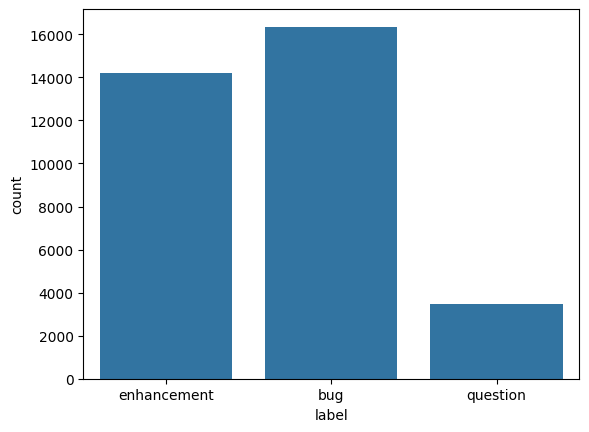

In [13]:
sns.countplot(x = 'label', data = labels_clean_df)

In [14]:
# Cleaning data further by removing stopwords and be consistent with casing
labels_clean_df['descriptionClean'] = labels_clean_df['description'].apply(lambda x: nfx.remove_stopwords(str(x).lower()))

In [15]:
labels_clean_df.head(10)

,label,description,descriptionClean
1,enhancement,Switch Router to Browser Router If we can fig...,switch router browser router figure switch rou...
3,enhancement,Enable autocompletion and quickinfo for confi...,enable autocompletion quickinfo config.js edit...
5,enhancement,User should be able to add product to custome...,user able add product customer order **given**...
6,enhancement,[page]: Add keyevent to close a page Add a ev...,[page]: add keyevent close page add eventkey c...
7,enhancement,建议增加类似 redux-devtools 的停靠窗口的功能 现在的 xswitch 作为...,建议增加类似 redux-devtools 的停靠窗口的功能 现在的 xswitch 作为一...
9,enhancement,Browser.assert.text should support an array o...,browser.assert.text support array expected tex...
14,enhancement,"Add ""Single tab mode""","add ""single tab mode"""
17,enhancement,Add support for more primitive types Gson sup...,add support primitive types gson supports prim...
19,enhancement,Daybloom uncraftable No recipe currently exis...,daybloom uncraftable recipe currently exists p...
23,enhancement,AuthScreen needs a full screen background ima...,authscreen needs screen background image right...


In [16]:
# Lists the frequency of each word
from collections import Counter
top_20 = pd.DataFrame(Counter(" ".join(labels_clean_df['descriptionClean']).split()).most_common(50),columns=['word', 'frequency'])
top_20.head(10)

,word,frequency
0,-,23452
1,```,15615
2,=,14456
3,file,8854
4,|,8419
5,{,8221
6,*,6424
7,line,6010
8,add,5943
9,[,5921


In [17]:
punctuations = "//\-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
punctuations_map = {"‘": "", "₹": "", "´": "", "°": "", "€": "", "™": "", "√": "  ", "×": "", "²": "", "—": "", "–": "", "’": "", "_": "",
                 "`": "", '“': '', '”': '', '“': '', "£": "", '∞': '', 'θ': '', '÷': '', 'α': '', '•': '', 'à': '', '−': '',
                 'β': '', '∅': '', '³': '', 'π': '','.':'', '-':'','/':'',':':'',',':'',"'":"",'"':'','(':'',')':'','*':'',
                 '=': '','#': '','[' : '',']':'','0': '','>': '','"\"': '""','0': '','>': '','<': '','{': '','}': '',
                 '1': '',';': '', '+':'','!':'','$':'','@':'','%':'','2':'','3':'','4':'','5':'','6':'','7':'',
                 '8':'','9':'','0':'','|':'','x':'','\\':'','&':'','~':'','^':''}
def remove_special_chars(text, punctuations, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    for p in punctuations:
        text = text.replace(p, f' {p} ')
    return text

In [18]:
labels_clean_df['descriptionClean'] = labels_clean_df['descriptionClean'].apply(lambda x: remove_special_chars(x, punctuations, punctuations_map))

In [19]:
print(labels_clean_df.head(10))
top_20 = pd.DataFrame(Counter(" ".join(labels_clean_df['descriptionClean']).split()).most_common(50),columns=['word', 'frequency'])
print(top_20.head(10))

          label                                        description  \
1   enhancement   Switch Router to Browser Router If we can fig...   
3   enhancement   Enable autocompletion and quickinfo for confi...   
5   enhancement   User should be able to add product to custome...   
6   enhancement   [page]: Add keyevent to close a page Add a ev...   
7   enhancement   建议增加类似 redux-devtools 的停靠窗口的功能 现在的 xswitch 作为...   
9   enhancement   Browser.assert.text should support an array o...   
14  enhancement                            Add "Single tab mode"     
17  enhancement   Add support for more primitive types Gson sup...   
19  enhancement   Daybloom uncraftable No recipe currently exis...   
23  enhancement   AuthScreen needs a full screen background ima...   

                                     descriptionClean  
1   switch router browser router figure switch rou...  
3   enable autocompletion quickinfo configjs editi...  
5   user able add product customer order given cus...  
6   p

Train-test split

In [20]:
# Split the data from training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(labels_clean_df['description'],labels_clean_df['label'],test_size=0.05,random_state=42)

**Model building**

**Logistic Regression**

This algorithms is used to build the issue classification model.
It uses Improved TF-IDF with 3-grams and better token handling.

In [21]:
# Importing machine learning packages. 
# The Pipeline package automates all the stages and processes used in building the model.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [22]:
## LogisticRegression with open coding
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import re

# Open Coding Function
def open_coding(text):
    text = text.lower()
    if re.search(r'\b(question|how|can|why|what|which|does|is it possible|should i|i was wondering|help|explain|are you)\b|\?', text):
        return 'question'
    if re.search(r'\b(error|crash|unexpected|bug|issue|fail|incorrect|wrong|broken|reproduce|debug|expected|steps|behavior)\b', text):
        return 'bug'
    if re.search(r'\b(improve|enhance|feature request|support|extend|add)\b', text):
        return 'enhancement'
    
    return 'other'  # Catch-all category (not used in final classification)

# Apply open coding
labels_clean_df['open_coding_label'] = labels_clean_df['descriptionClean'].apply(open_coding)

# Remove unnecessary labels
labels_clean_df = labels_clean_df[labels_clean_df['open_coding_label'] != 'other']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(labels_clean_df['descriptionClean'], labels_clean_df['open_coding_label'], test_size=0.2, random_state=6)

# Improved TF-IDF with 3-grams and better token handling
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1,3),  # Capture phrase context
    max_df=0.9,         # Ignore very common words
    min_df=2,           # Ignore rare words
    stop_words='english', 
    token_pattern=r'(?u)\b\w+\b|[?]',  # Include special characters like "?"
)

# Pipeline for LogisticRegression
pipeline_lr = Pipeline(steps=[
    ('tfidf', tfidf_vectorizer),  # Convert text to TF-IDF features
    ('lr', LogisticRegression(max_iter=500))  # Train using Logistic Regression
])

# Train and predict using LogisticRegression
pipeline_lr.fit(x_train, y_train)
y_pred_lr = pipeline_lr.predict(x_test)

# Evaluate LogisticRegression
print("LogisticRegression Performance:")
print(classification_report(y_test, y_pred_lr))


LogisticRegression Performance:
              precision    recall  f1-score   support

         bug       0.87      0.96      0.91      1451
 enhancement       0.93      0.91      0.92       700
    question       0.97      0.89      0.92      1674

    accuracy                           0.92      3825
   macro avg       0.92      0.92      0.92      3825
weighted avg       0.92      0.92      0.92      3825



In [28]:
## Prepare/clean manual testing dataset

df_test = pd.read_csv('https://raw.githubusercontent.com/abritidas/Automatic-Issue-Labeling-using-Machine-Learning/refs/heads/main/manual_test_data.csv', header=None, sep=',')
df_test = df_test[0].str.split(r'(__label__enhancement)|(__label__bug)|(__label__question)', expand=True)

test_enhancement_df = df_test[df_test[1] == '__label__enhancement'][[1,4]]
test_bug_df = df_test[df_test[2] == '__label__bug'][[2,4]]
test_question_df = df_test[df_test[3] == '__label__question'][[3,4]]

test_enhancement_df.columns = ['label','description']
test_bug_df.columns = ['label','description']
test_question_df.columns = ['label','description']

test_final_df = pd.concat([test_enhancement_df, test_bug_df, test_question_df])
test_final_df['label'] = test_final_df['label'].str.replace('__label__', '')
test_final_df['descriptionClean'] = test_final_df['description'].apply(lambda x: nfx.remove_stopwords(str(x).lower()))

df_test.head(5)

,0,1,2,3,4
0,,None,__label__bug,None,Correct Minimum Java Requirement to 17 Instea...
1,,None,None,__label__question,Investigate if XSoup is still needed IIRC we ...
2,,None,__label__bug,None,Jacoco Coverage doesn't meet specified criter...
3,,None,None,__label__question,WARCHdfsBolt forwarding WARC file path to Sta...
4,,None,__label__bug,None,PostgreSQL Binding fails PostgreSQLDiagnostic...


label
bug            13
question       12
enhancement    11
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

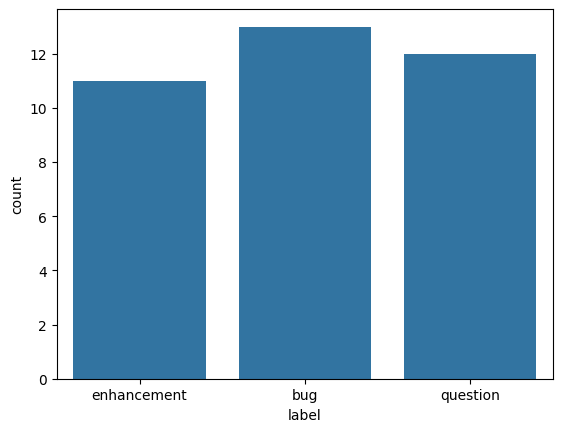

In [29]:
print(test_final_df['label'].value_counts())
sns.countplot(x = 'label', data = test_final_df)

In [30]:
## Run LogisticRegression model on testing Manual data

from sklearn.metrics import classification_report

# Predict using the trained model
test_final_df['predicted_label'] = pipeline_lr.predict(test_final_df['descriptionClean'])

# Filter mismatches
mismatches_df = test_final_df[test_final_df['label'] != test_final_df['predicted_label']]

# Pretty print mismatches using pandas formatting
print("\n❌ Mismatched Predictions:")
print(mismatches_df[['label', 'predicted_label', 'description']])

# Print F1 score summary
print("\n📊 Classification Report on Test Data:")
print(classification_report(test_final_df['label'], test_final_df['predicted_label']))


❌ Mismatched Predictions:
          label predicted_label  \
13  enhancement        question   
16  enhancement        question   
19  enhancement             bug   
7           bug        question   
1      question             bug   

                                          description  
13   implement Backdrop component to block user in...  
16   Make screen size available in st.context Make...  
19   Enable formatting/styling of editable columns...  
7    st.popover won't use container width if help ...  
1    Investigate if XSoup is still needed IIRC we ...  

📊 Classification Report on Test Data:
              precision    recall  f1-score   support

         bug       0.86      0.92      0.89        13
 enhancement       1.00      0.73      0.84        11
    question       0.79      0.92      0.85        12

    accuracy                           0.86        36
   macro avg       0.88      0.86      0.86        36
weighted avg       0.88      0.86      0.86        36



***Pipeline package has automated the model building. It is done in two stages***

We have two stages as follows:
1.   Convert text to TF-IDF features
2.   Using the Logistic Regression algorithm to train the model.

In [31]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(pipeline_lr, x_train, y_train)
print("\n Cross Validation Scores are {}".format(score))
print("\n Average Cross Validation score :{}".format(score.mean()))

# Actual label: Bug
input_description = "Changed files not detected for file upload"

#Predicted Label
print("\n Predicted Label: " + pipeline_lr.predict([input_description])[0])


 Cross Validation Scores are [0.91176471 0.9120915  0.91601307 0.90718954 0.91173586]

 Average Cross Validation score :0.9117589369844048

 Predicted Label: bug
